# Learning from disaster

## 1. Defining the question

## 1.1. Specifying the Data Analytic question

The RMS Titanic was a luxury steamship that was considered to be unsinkable. It set sail on its maiden voyage from Southampton, England to New York City on April 10, 1912. The ship was carrying more than 2,200 passengers and crew. On the night of April 14, the Titanic struck an iceberg and began to sink. Despite the crew's efforts to keep the ship afloat, it eventually went down in the early hours of April 15. Many of the lifeboats on board were not filled to capacity, and there were not enough for all of the passengers and crew. As a result, more than 1,500 people died in the disaster. The Titanic's sinking was one of the worst peacetime maritime disasters in history and continues to be remembered as a tragic event.

> In our analysis we would like to know who had a higher chance of surviving and under which circumstances this was to happen.

## 1.2. Define the metric for success.

- Creating a model that has an adjusted R-squared of 0.80.

## 1.3. Understanding the context.

## 1.4. Reading the experimental design.

## 1.5. Data relevance 

# 2. Loading the data

In [1]:
#importing the relevant libraries
import pandas as pd 
import numpy as np 
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import re
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model
from scipy.stats import levene
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the data set
training = pd.read_csv("titanic/train.csv")
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Data Understanding.

In [3]:
#getting information about the data set.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> The data set has been sourced from Kaggle.It has 12 columns and 891 rows.
- PassengerId 
- Survived - shows who survived and who did not.
- Pclass - Ticket class.
- Name - Name of the passenger.
- Sex - Gender of the passenger.
- Age - Age of passenger in years.
- SibSp - Whether a passenger has a sibling or spouse.
- Parch - Whether a passenger has a parent or child aboard.
- Ticket - Ticket number 
- Fare - Passenger fare 
- Cabin - Cabin number
- Embarked - Port of embarkation. 


In [4]:
#checking the number of records our dataset has.
training.shape

(891, 12)

In [5]:
#checking the bottom of the data set.
training.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#checking the descriptive statistics.
training.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hodges, Mr. Henry Price",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


> The average age for someone who boarded was 29 years old,the avarage fare for a passenger was 32.20

# 4. External Data Source Validation.

# 5. Tidying the dataset.

In [7]:
#checking whether there are any missing values
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> Columns with missing values are age,Cabin and Embarked.Since Age is relevant to our analysis,we can replace it with the mean age.

> The null values in rows of cabin column,are more than 50% of the data set,therefore cannot be dropped as wil it affect the integrity of our analysis.

In [8]:
#checking if there are duplicates
training.duplicated().sum()

0

> There are no duplicates in the data set.

In [9]:
#getting the age median
training["Age"].median()

28.0

In [10]:
#replacing null values in the Age column
training["Age"].fillna(value=28, inplace=True)

In [11]:
#confirming whether the null values have been replaced
training["Age"].isnull().sum()

0

In [12]:
training.drop(columns=["Name","PassengerId","Ticket","Cabin"], axis=1,inplace = True)

In [13]:
training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
training.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

# 6. Exploratory Analysis.

## Univariate analysis

In [15]:
training.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

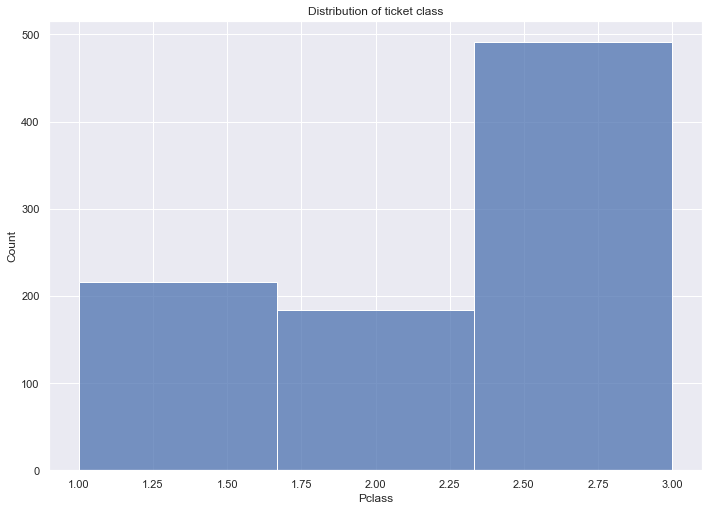

In [16]:
#checking the distribution of ticket class.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=training, x="Pclass",bins=3).set(title="Distribution of ticket class")
plt.show();

> There were three classes in the titanic,First,Second and Third.As shown,most people were in the third class.

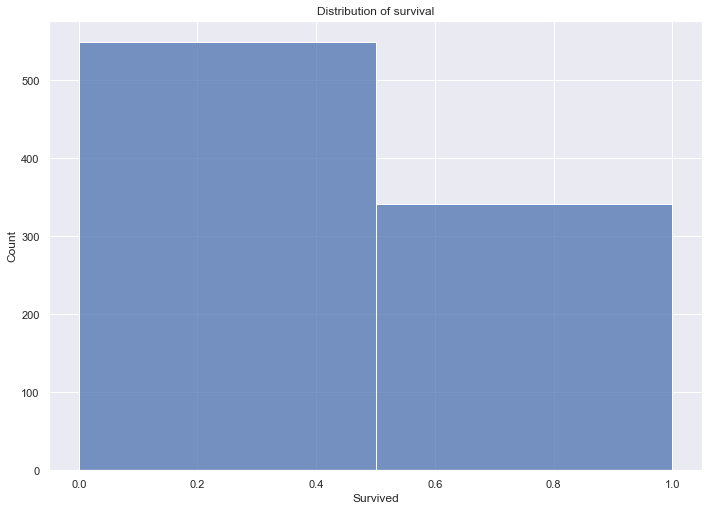

In [17]:
#distribution of those who survived
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=training, x="Survived",bins=2).set(title="Distribution of survival")
plt.show();

> As shown,there was a higher number of people who did not survive than those who did.

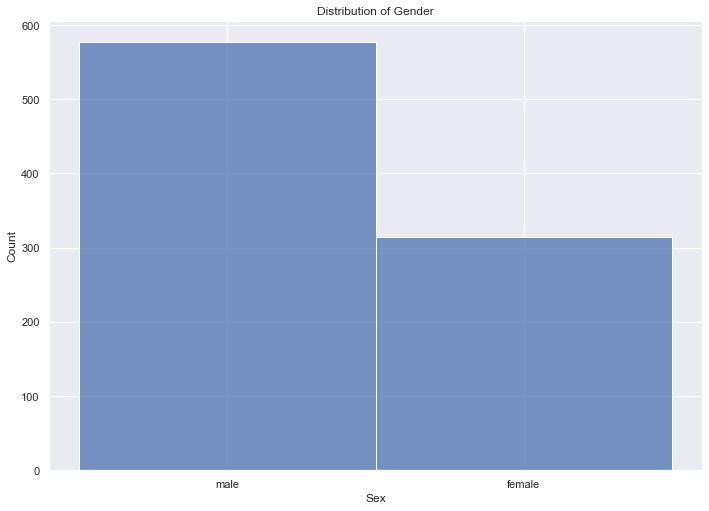

In [19]:
#distribution of gender in the titanic
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=training, x="Sex").set(title="Distribution of Gender")
plt.show();

> The males were more in the titanic than females.

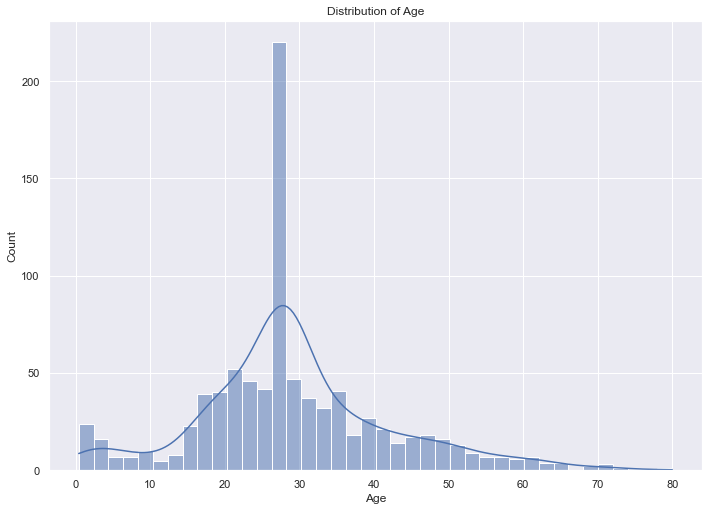

In [20]:
#distribution of the age in the titanic.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=training, x="Age",bins=40,kde=True).set(title="Distribution of Age")
plt.show();

> The distribution of Age was normal.Also the most number of people were aged from 27 - 28 years.

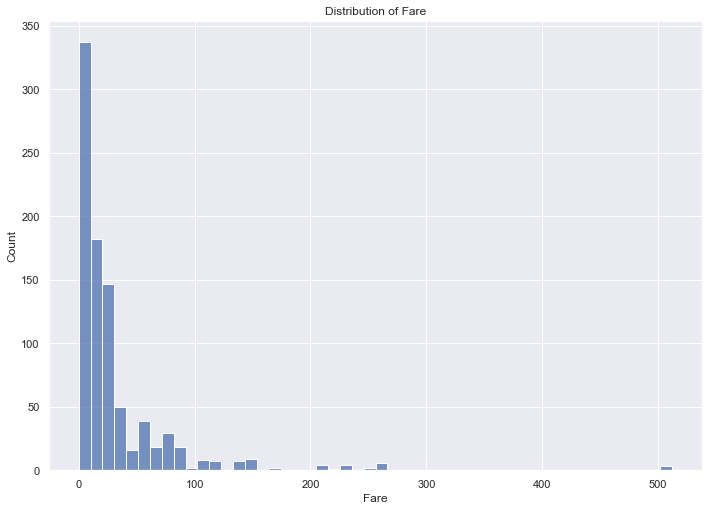

In [21]:
#distribution of fare 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=training, x="Fare",bins = 50).set(title="Distribution of Fare")
plt.show();

> Since most people were in third class,the price of the ticket ranged from £7.

## Multivariate analysis 

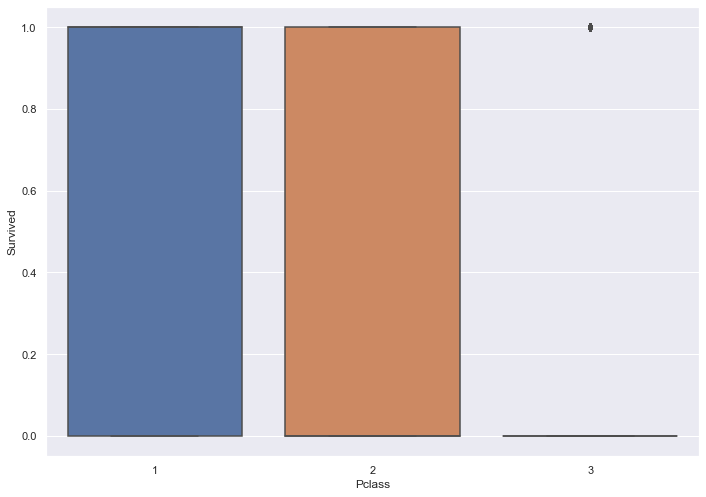

In [22]:
#correlation between class and survival rate
sns.boxplot(data=training, x=training["Pclass"], y=training["Survived"]);

> As seen above,people in the third class had a very low survival rate,the first and second class survived the most.

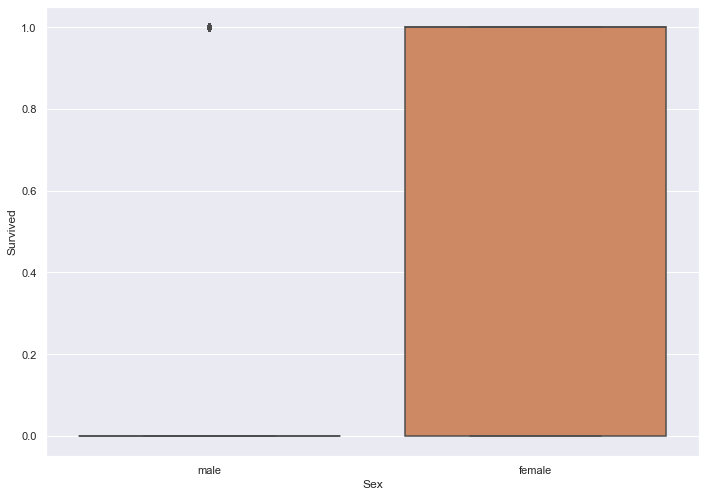

In [23]:
#correlation between gender aboard and survival 
sns.boxplot(data=training, x="Sex", y="Survived");

> Females had a higher chance of surviving than males.

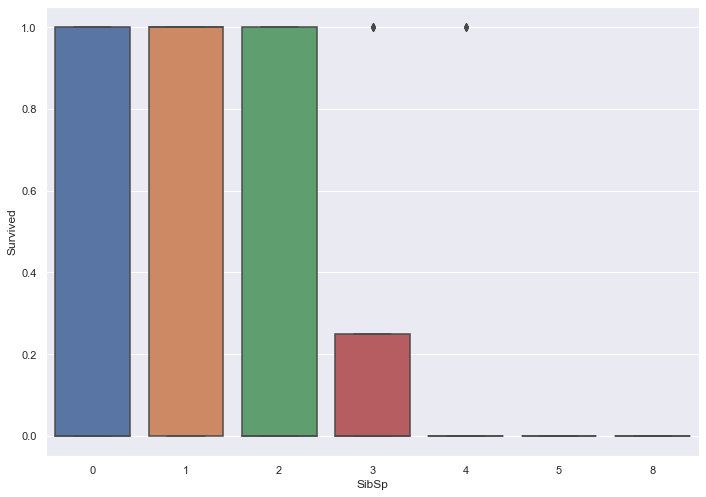

In [24]:
#correlation between number of siblings/spouses aboard and survival 
sns.boxplot(data=training, x="SibSp", y="Survived");

> Passengers with 0-3 siblings and or spouses had a higher chance of surviving.

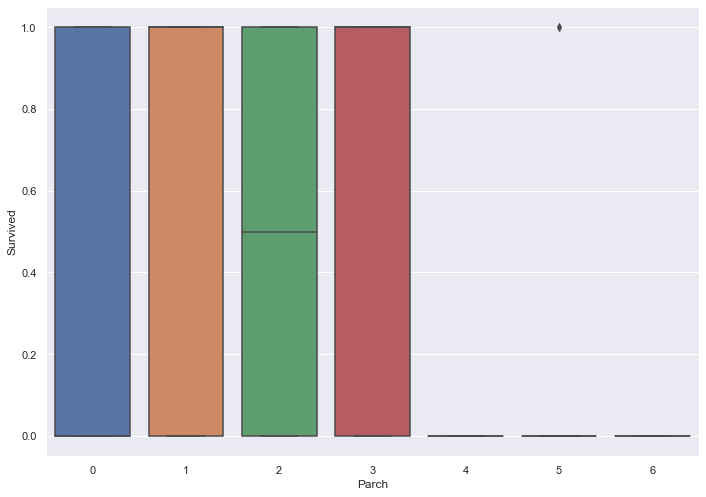

In [25]:
#correlation between number of children/parents aboard and survival 
sns.boxplot(data=training,x="Parch",y="Survived");

> Passengers with 0-3 parents and or children had a higher chance of surviving.

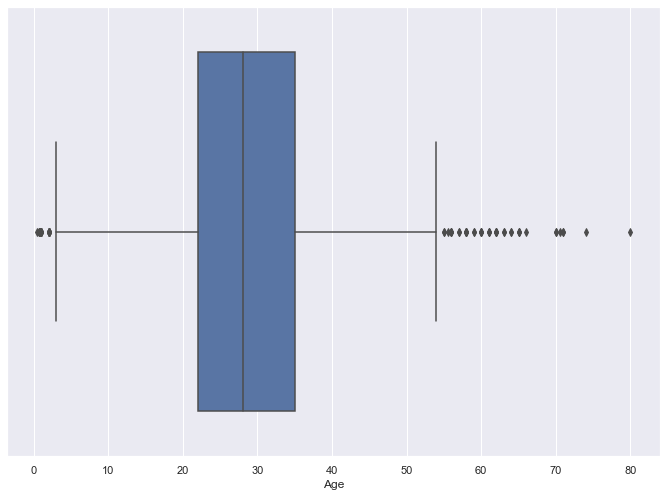

In [26]:
sns.boxplot(data=training,x="Age",hue="Survived");

> People from the ages 22 to 35 had a higher chance of survival.

In [27]:
#Transposing the table
training.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Outliers


In [28]:
#creating a function that removes outliers.
def outlierRemover(df,num_cols):
    for x in [num_cols]:
        q75,q25 = np.percentile(training.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    return df


In [29]:
#numerical columns to remove outliers.
columns = ['Age','Fare']

for c in columns:
    outlierRemover(training,c)

In [30]:
training.shape

(891, 8)

In [32]:
training = training.dropna()
training.shape

(721, 8)

In [33]:
#creating a variable for categorical columns.
categorical_columns = ['Survived','Pclass','Sex','SibSp','Parch']
#creating an instance for label encoder.
labelencoder = LabelEncoder()

for c in categorical_columns:
    training[c] = labelencoder.fit_transform(training[c])
    
training


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,S
2,1,2,0,26.0,0,0,7.9250,S
3,1,0,0,35.0,1,0,53.1000,S
4,0,2,1,35.0,0,0,8.0500,S
5,0,2,1,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
886,0,1,1,27.0,0,0,13.0000,S
887,1,0,0,19.0,0,0,30.0000,S
888,0,2,0,28.0,1,2,23.4500,S
889,1,0,1,26.0,0,0,30.0000,C


# 7. Implementing the solution.

### Correlations.

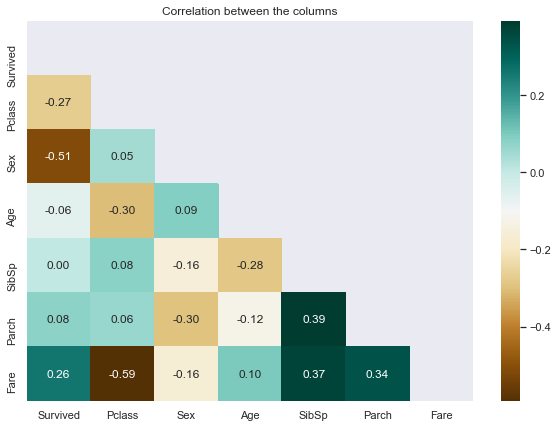

In [35]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(training.corr(), dtype=bool))
sns.heatmap(training.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

### Checking for multicollinearity using VIF

In [36]:
#independent variables set
X = training[["Pclass",'Sex','Age','SibSp','Parch','Fare']]
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feauture"] = X.columns

#getting VIF for each feauture
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]
pd.DataFrame(vif_data).sort_values(by=['VIF'],ascending=False)

,Feauture,VIF
2,Age,6.702692
0,Pclass,4.379467
5,Fare,4.092981
1,Sex,3.289298
3,SibSp,1.893572
4,Parch,1.632954


### Normality

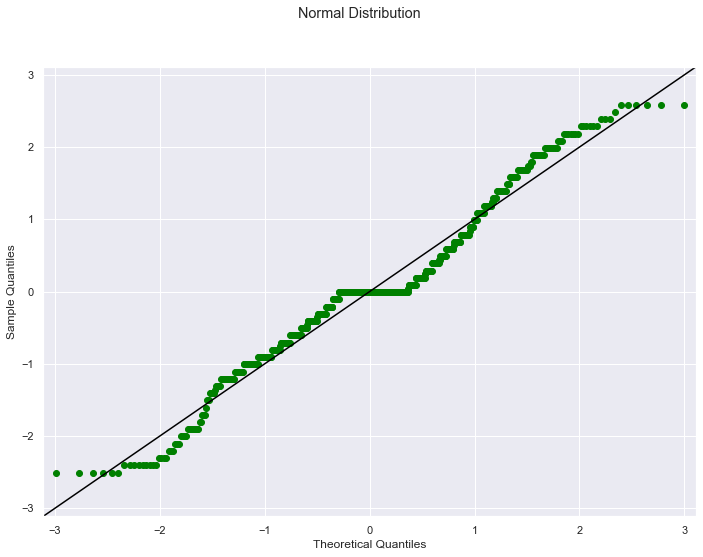

In [37]:
#plotting a normal distribution visualization
fig, ax = plt.subplots()
sm.graphics.qqplot(training["Age"], dist=stats.norm, line='45', fit=True, ax=ax)

scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

### Modelling

In [41]:
# checking the test data 
test = pd.read_csv("titanic/test.csv")
test.info()
#this will be used to test our model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Train model

# 8. Challenging the solution.

# 9. Follow up questions.